In [24]:
# Import or install Sionna
try:
    import sionna.rt
except ImportError as e:
    import os
    os.system("pip install sionna-rt")
    import sionna.rt

# Other imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

no_preview = False # Toggle to False to use the preview widget

# Import relevant components from Sionna RT
from sionna.rt import load_scene, PlanarArray, Transmitter, Receiver, Camera,\
                      PathSolver, RadioMapSolver, subcarrier_frequencies, SceneObject, ITURadioMaterial

In [3]:
!mkdir meshes

In [25]:
# Load integrated scene
#/content/DeepMIMOScenario01Envfinaltest2.xml
scene = load_scene('/content/DeepMIMOScenario01Envtest2.xml', merge_shapes=True) # Try also sionna.rt.scene.etoile
#scene = load_scene(sionna.rt.scene.simple_street_canyon)

In [ ]:
if not no_preview:
    scene.preview();

ValueError: Can't clean for JSON: [-48.9044, 11.1161, -30.9202]

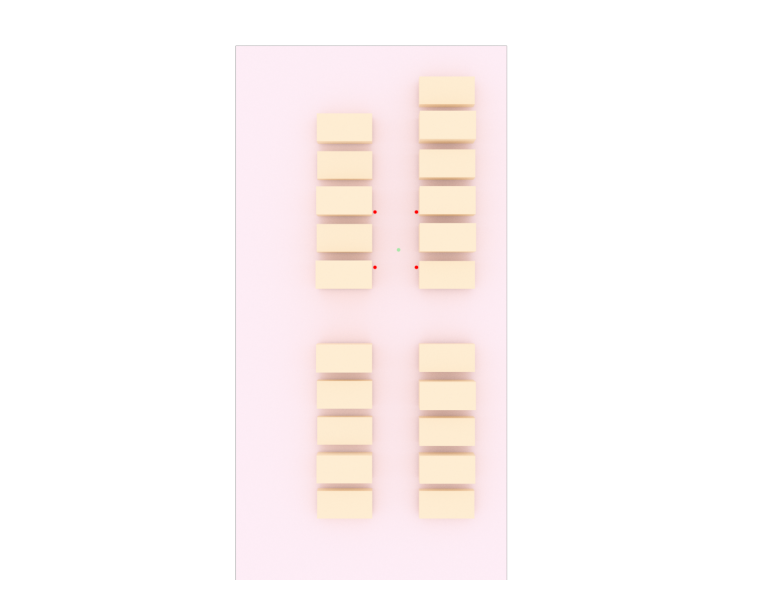

In [26]:
my_cam = Camera(position=[0,0,1000], look_at=[0,0, 0])

#scene.render(camera=my_cam, resolution=[1300, 1000], num_samples=512);

# Configure antenna array for all transmitters
scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="tr38901",
                             polarization="V")

# Configure antenna array for all receivers
scene.rx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="dipole",
                             polarization="cross")

tx_positions = [
    [30, -39, 30],
    [90, -39, 30],
    [30, 6,  30],
    [90, 6, 30]
]

# Create a receiver
rx = Receiver(name="rx",
              position=[50,-20,10],
              display_radius=2)

# Add receiver instance to scene
scene.add(rx)

for i, pos in enumerate(tx_positions):
    tx = Transmitter(name=f"tx{i+1}", position=pos, display_radius=2)
    scene.add(tx)
    tx.look_at(rx)
# Render scene with new camera*
scene.render(camera=my_cam, resolution=[1300, 1000], num_samples=1024); # Increase num_samples to increase image quality

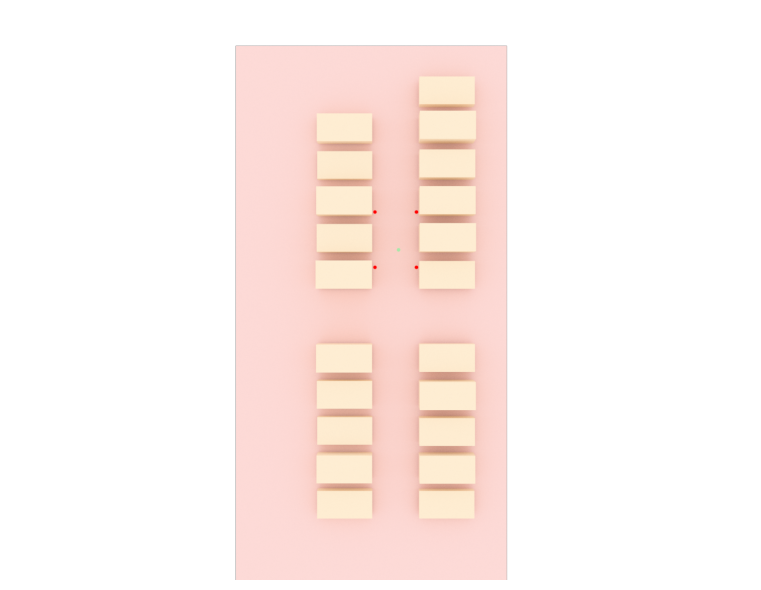

In [21]:
my_cam = Camera(position=[0,0,1000], look_at=[0,0, 0])
scene.render(camera=my_cam, resolution=[1300, 1000], num_samples=1024);

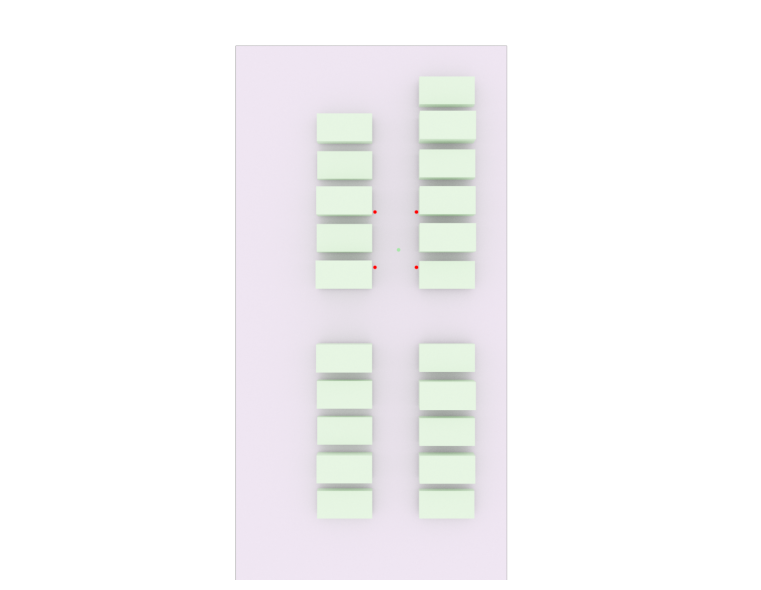

In [10]:
p_solver  = PathSolver()

# Compute propagation paths
paths = p_solver(scene=scene,
                 max_depth=30,
                 los=True,
                 specular_reflection=True,
                 diffuse_reflection=False,
                 refraction=True,
                 synthetic_array=False,
                 seed=41)


In [22]:
my_cam = Camera(position=[0,0,1000], look_at=[0,0, 0])
scene.render(camera=my_cam, paths = paths, resolution=[1300, 1000], num_samples=1024);

NameError: name 'paths' is not defined

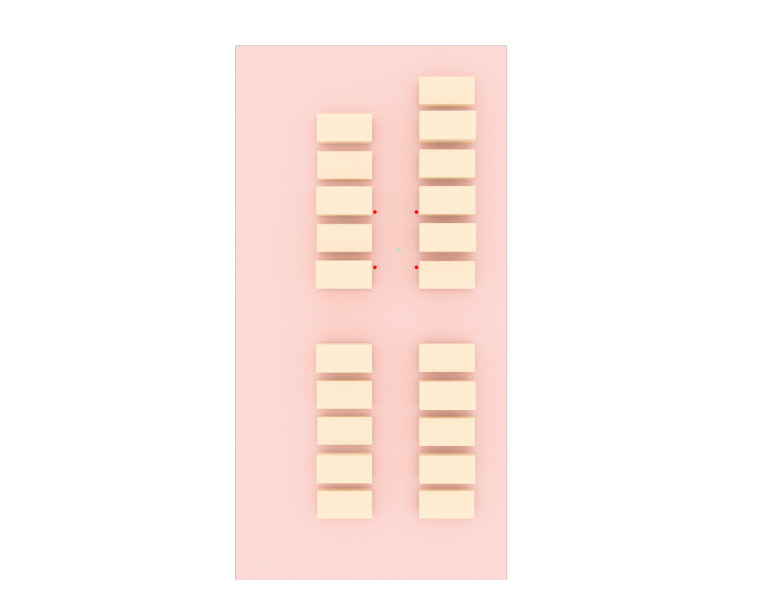

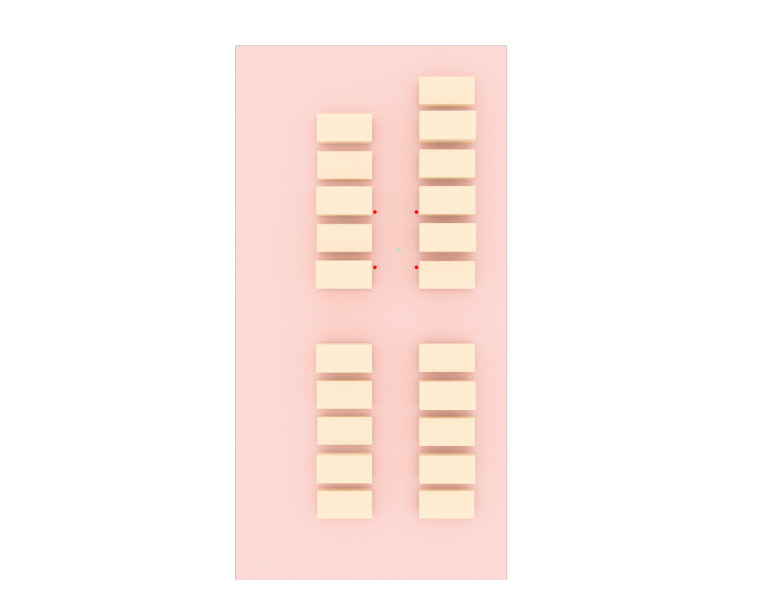

In [23]:
my_cam = Camera(position=[0,0,1000], look_at=[0,0, 0])
scene.render(camera=my_cam, resolution=[1300, 1000], num_samples=1024)

In [27]:
import mitsuba as mi
from sionna.rt import SceneObject, ITURadioMaterial
car_material = ITURadioMaterial("car-material",
                                "metal",
                                thickness=0.01,
                                color=(0.8, 0.1, 0.1))

car = SceneObject(fname=sionna.rt.scene.low_poly_car, # Simple mesh of a car
                    name=f"car-{i}",
                    radio_material=car_material)
scene.edit(add=car)
car.position = mi.Point3f(30, -34, 20)

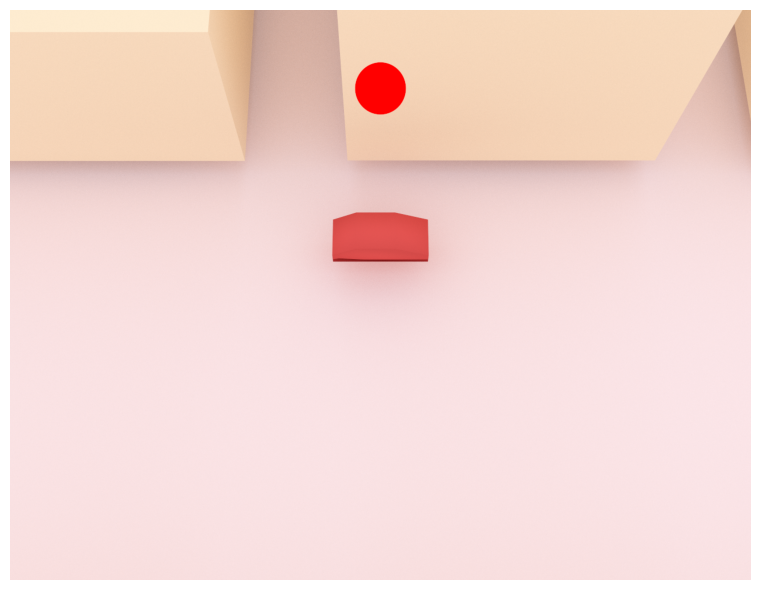

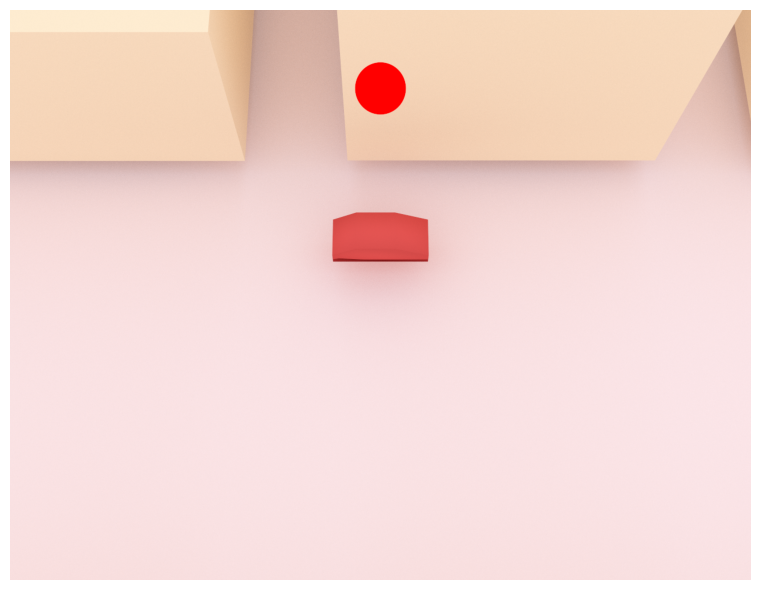

In [34]:
car.position = mi.Point3f(90, 0, 15)
car.scaling = 2.0 # car size
my_cam = Camera(position=[90,-34, 90], look_at=[90, 0, 0])
scene.render(camera=my_cam, resolution=[1300, 1000], num_samples=1024)

In [14]:
scene.edit(remove=car)

AssertionError: 